In [1]:
import torch
import numpy as np
import matplotlib.pylab as plt
from IPython.display import clear_output
import torch.nn as nn 

import pipeline
import consts
from importlib import reload
import plot
import json
reload(plot)
reload(pipeline)
plot.prepare_for_plots()

Using cuda device


<Figure size 864x720 with 0 Axes>

In [ ]:
train_dataloader, test_dataloader = pipeline.get_data()

In [29]:
dist = 'uniform'
eps = 1e-1

In [30]:
mask = torch.tensor([1, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=torch.float).to(consts.device)
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

loss_fn = nn.CrossEntropyLoss(weight=mask)

for i in range(consts.num_repeats):
    clear_output()

    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    model = pipeline.make_student_model()
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.teacher_5_learning_rate)
   

    for epoch in range(consts.teacher_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer,
                            noise_dist=dist, noise_eps=eps)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)

    torch.save(model.state_dict(), pipeline.get_path()+f'/noise_initialization_{i}.pt')

Model 10
-------------------------------
-------------------------------
Epoch 1
-------------------------------


Validation accuracy: 71.6%, Validation loss: 1.044320 

Epoch 2
-------------------------------


Validation accuracy: 73.0%, Validation loss: 0.899080 

Epoch 3
-------------------------------


Validation accuracy: 85.4%, Validation loss: 0.406058 

Epoch 4
-------------------------------


Validation accuracy: 86.5%, Validation loss: 0.383237 

Epoch 5
-------------------------------


Validation accuracy: 86.7%, Validation loss: 0.369751 

Epoch 6
-------------------------------


Validation accuracy: 86.9%, Validation loss: 0.359606 

Epoch 7
-------------------------------


Validation accuracy: 87.1%, Validation loss: 0.351439 

Epoch 8
-------------------------------


Validation accuracy: 87.4%, Validation loss: 0.344777 

Epoch 9
-------------------------------


Validation accuracy: 87.8%, Validation loss: 0.338480 

Epoch 10
-------------------------------


Validation accuracy: 88.1%, Validation loss: 0.333106 

Epoch 11
-------------------------------


Validation accuracy: 88.2%, Validation loss: 0.327781 

Epoch 12
-------------------------------


Validation accuracy: 88.5%, Validation loss: 0.323254 

Epoch 13
-------------------------------


Validation accuracy: 88.5%, Validation loss: 0.318362 

Epoch 14
-------------------------------


Validation accuracy: 88.7%, Validation loss: 0.314216 

Epoch 15
-------------------------------


Validation accuracy: 88.9%, Validation loss: 0.310262 

Epoch 16
-------------------------------


Validation accuracy: 89.0%, Validation loss: 0.306621 

Epoch 17
-------------------------------


Validation accuracy: 89.2%, Validation loss: 0.303337 

Epoch 18
-------------------------------


Validation accuracy: 89.2%, Validation loss: 0.300399 

Epoch 19
-------------------------------


Validation accuracy: 89.3%, Validation loss: 0.297723 

Epoch 20
-------------------------------


Validation accuracy: 89.4%, Validation loss: 0.295160 

Epoch 21
-------------------------------


Validation accuracy: 89.4%, Validation loss: 0.292849 

Epoch 22
-------------------------------


Validation accuracy: 89.5%, Validation loss: 0.290889 

Epoch 23
-------------------------------


Validation accuracy: 89.5%, Validation loss: 0.289280 

Epoch 24
-------------------------------


Validation accuracy: 89.6%, Validation loss: 0.287049 

Epoch 25
-------------------------------


Validation accuracy: 89.7%, Validation loss: 0.285678 

Epoch 26
-------------------------------


Validation accuracy: 89.8%, Validation loss: 0.284061 

Epoch 27
-------------------------------


Validation accuracy: 89.8%, Validation loss: 0.282432 

Epoch 28
-------------------------------


Validation accuracy: 89.8%, Validation loss: 0.280745 

Epoch 29
-------------------------------


Validation accuracy: 90.0%, Validation loss: 0.280081 

Epoch 30
-------------------------------


Validation accuracy: 90.2%, Validation loss: 0.278899 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
mask = torch.ones(10).to(consts.device)

loss_fn = nn.CrossEntropyLoss()

for i in range(consts.num_repeats):
    clear_output()
    print(f"Model {i+1}\n-------------------------------"
                      "\n-------------------------------")

    torch.manual_seed(i)

    model = pipeline.make_student_model()
    model.load_state_dict(torch.load(pipeline.get_path()+f'/noise_initialization_{i}.pt'))
    
    optimizer = torch.optim.Adam(model.parameters(), lr=consts.student_5_learning_rate)
    
    for epoch in range(consts.student_5_training_epochs):
        print(f"Epoch {epoch+1}\n-------------------------------")

        pipeline.train_loop(model,  history, mask, train_dataloader, loss_fn, optimizer)
        pipeline.test_loop(model, history, mask, test_dataloader, loss_fn)

    pipeline.test_loop_fsgm(model, history, mask, test_dataloader, loss_fn, consts.fsgm_eps)
    pipeline.test_loop_noise(model, history, mask, test_dataloader, consts.noise_eps)
    torch.save(model.state_dict(), pipeline.get_path()+f'/noise_final_{i}.pt')

Model 10
-------------------------------
-------------------------------
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1
-------------------------------


Validation accuracy: 54.5%, Validation loss: 1.265538 

Epoch 2
-------------------------------


Validation accuracy: 66.1%, Validation loss: 0.963281 

Epoch 3
-------------------------------


Validation accuracy: 67.0%, Validation loss: 0.890369 

Epoch 4
-------------------------------


Validation accuracy: 67.5%, Validation loss: 0.862668 

Epoch 5
-------------------------------


Validation accuracy: 67.8%, Validation loss: 0.846054 

Epoch 6
-------------------------------


Validation accuracy: 67.9%, Validation loss: 0.834635 

Epoch 7
-------------------------------


Validation accuracy: 68.2%, Validation loss: 0.826423 

Epoch 8
-------------------------------


Validation accuracy: 68.3%, Validation loss: 0.819939 

Epoch 9
-------------------------------


Validation accuracy: 77.3%, Validation loss: 0.686741 

Epoch 10
-------------------------------


Validation accuracy: 77.3%, Validation loss: 0.640964 

Epoch 11
-------------------------------


Validation accuracy: 77.5%, Validation loss: 0.624075 

Epoch 12
-------------------------------


Validation accuracy: 77.7%, Validation loss: 0.614607 

Epoch 13
-------------------------------


Validation accuracy: 77.8%, Validation loss: 0.607963 

Epoch 14
-------------------------------


Validation accuracy: 77.9%, Validation loss: 0.602730 

Epoch 15
-------------------------------


Validation accuracy: 78.1%, Validation loss: 0.598270 

Epoch 16
-------------------------------


Validation accuracy: 78.2%, Validation loss: 0.594421 

Epoch 17
-------------------------------


Validation accuracy: 78.2%, Validation loss: 0.591264 

Epoch 18
-------------------------------


Validation accuracy: 78.3%, Validation loss: 0.588364 

Epoch 19
-------------------------------


Validation accuracy: 78.4%, Validation loss: 0.586076 

Epoch 20
-------------------------------


Validation accuracy: 78.4%, Validation loss: 0.583916 

Epoch 21
-------------------------------


Validation accuracy: 78.5%, Validation loss: 0.581875 

Epoch 22
-------------------------------


Validation accuracy: 78.6%, Validation loss: 0.580056 

Epoch 23
-------------------------------


Validation accuracy: 78.6%, Validation loss: 0.577871 

Epoch 24
-------------------------------


Validation accuracy: 78.7%, Validation loss: 0.576296 

Epoch 25
-------------------------------


Validation accuracy: 78.7%, Validation loss: 0.574886 

Epoch 26
-------------------------------


Validation accuracy: 78.7%, Validation loss: 0.573843 

Epoch 27
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.572783 

Epoch 28
-------------------------------


Validation accuracy: 78.7%, Validation loss: 0.571795 

Epoch 29
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.570980 

Epoch 30
-------------------------------


Validation accuracy: 78.8%, Validation loss: 0.569877 



FSGM Accuracy [0.7878, 0.7631, 0.7341, 0.7057, 0.6738, 0.6384, 0.6037, 0.5656, 0.5297, 0.4905]


Noise Accuracy [0.7878, 0.776, 0.7456, 0.7073, 0.6474, 0.6042, 0.5034, 0.438, 0.3667, 0.3251]
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


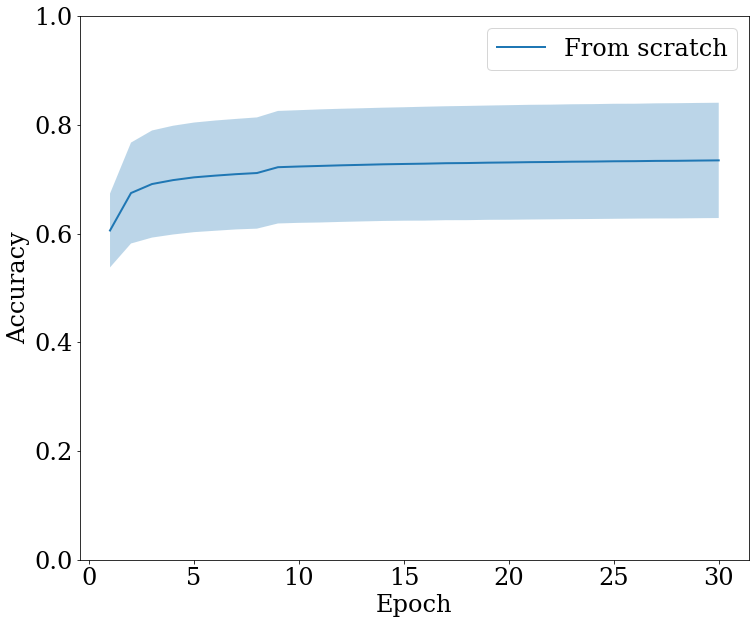

In [36]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], np.arange(1, consts.student_5_training_epochs + 1),
                   ['From scratch'], 'val_acc', 
                    'Epoch', 'Accuracy')

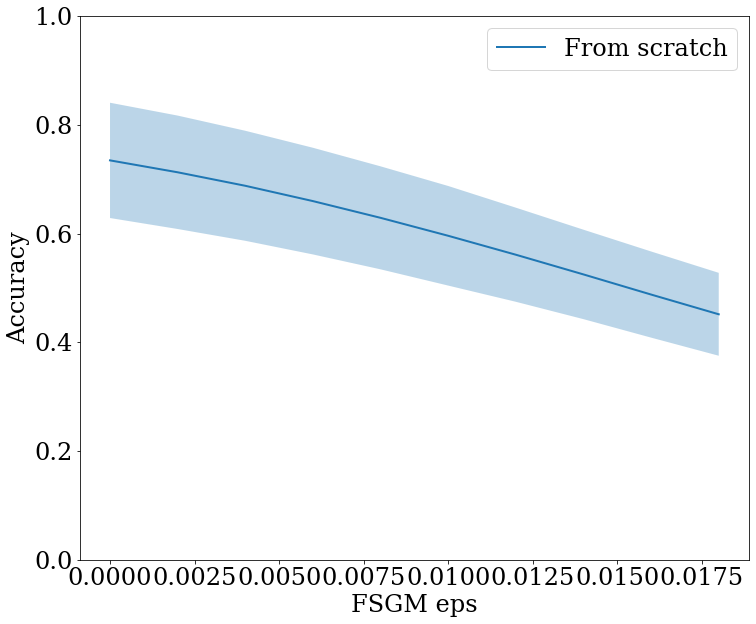

In [37]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'fsgm_noise_acc', 
                    'FSGM eps', 'Accuracy')

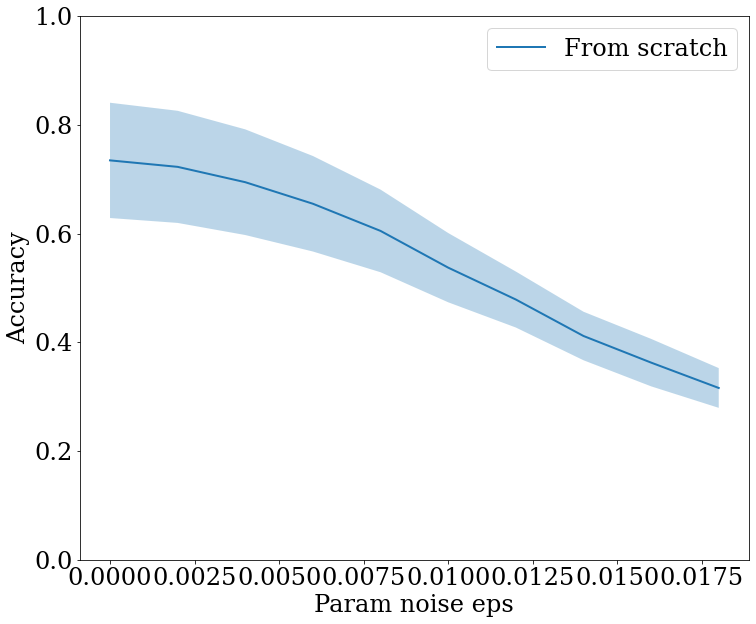

In [38]:
reload(plot)
plot.prepare_for_plots()
plot.plot_variance([history], consts.fsgm_eps,
                   ['From scratch'], 'param_noise_acc', 
                    'Param noise eps', 'Accuracy')

In [35]:
with open(pipeline.get_path() + '/history_noise.json', 'w') as out:
    out.write(json.dumps(history))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
